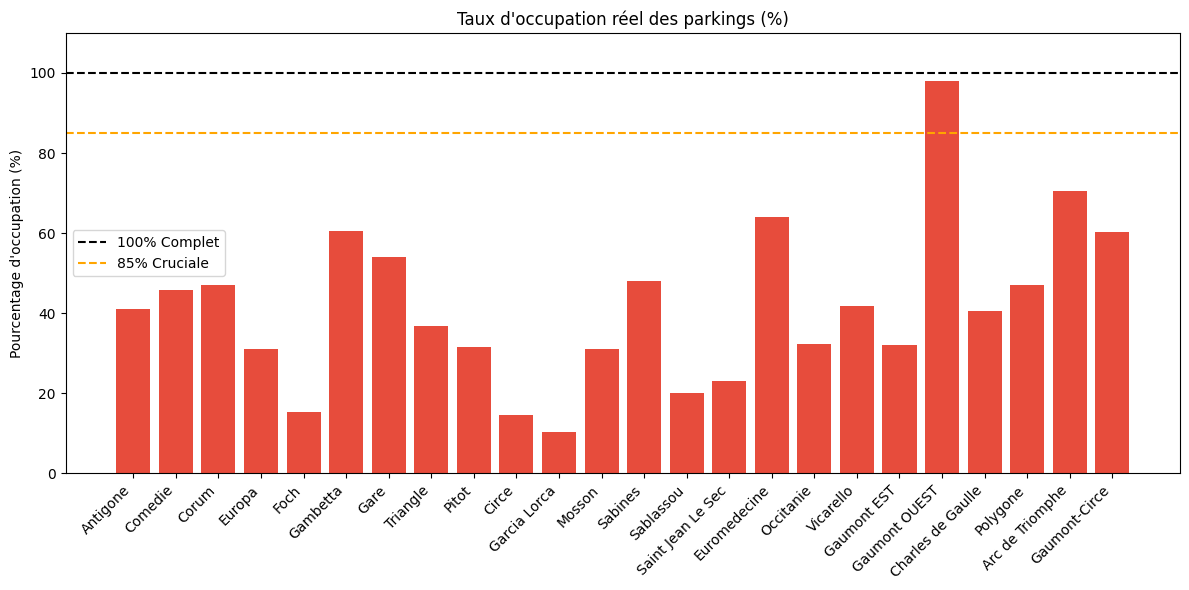

In [ ]:
# 1. Initialisation : Import des Librairies et Chargement des Données JSON
import json
import matplotlib.pyplot as plt
import analyses 

# ouvrire et lire le fichier de donnee voiture
with open('VOITURE169.json', 'r') as f:
    voit_data = json.load(f)

# 2. Analyse Dimensionnelle : Taux d'Occupation Réel des Parkings (Voitures)
# Instead of raw numbers, we store percentages immediately.

saturation_by_parking = {} 

for hour_entry in voit_data:
    for parking in hour_entry['donnees']:
        name = parking['nom']
        occupied = parking['occuper']
        total_spots = parking['total']
        
        # eciter les division par 0, si un des garage est fermer ou HS
        if total_spots > 0:
            percentage = (occupied / total_spots) * 100
        else:
            percentage = 0
        
        if name not in saturation_by_parking:
            saturation_by_parking[name] = []
        
        saturation_by_parking[name].append(percentage)

# --- STEP 3: ANALYZE & VISUALIZE ---

names = list(saturation_by_parking.keys())
values_lists = list(saturation_by_parking.values())

# utilise moy de ma librarie 
means = analyses.moy(*values_lists)

# cree et illustree le graph
plt.figure(figsize=(12, 6))
bars = plt.bar(names, means, color='#e74c3c') 

# ajouter des ligne pour les ref a 100% (complet) et 85% (bien remplie)
plt.axhline(y=100, color='black', linestyle='--', label='100% Complet')
plt.axhline(y=85, color='orange', linestyle='--', label='85% Cruciale')

plt.title("Taux d'occupation réel des parkings (%)")
plt.ylabel("Pourcentage d'occupation (%)")
plt.ylim(0, 110) # limite a 110% pour voire le graphe plus claire
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### Analyse du Taux de Remplissage
Le graphique ci-dessus montre le taux d'occupation relatif à la capacité totale de chaque parking.
* **Constat Critique :** Le parking **Charles de Gaulle** est saturé en permanence (proche de 100% en moyenne). Il est clairement sous-dimensionné.
* **Constat d'Opportunité :** Des parkings comme **Garcia Lorca** ou **Sabines** sont très peu utilisés (< 25%).
* **Conclusion :** Il y a un déséquilibre fort. La mairie devrait inciter les usagers à se garer en périphérie (Lorca/Sabines) plutôt qu'au centre.

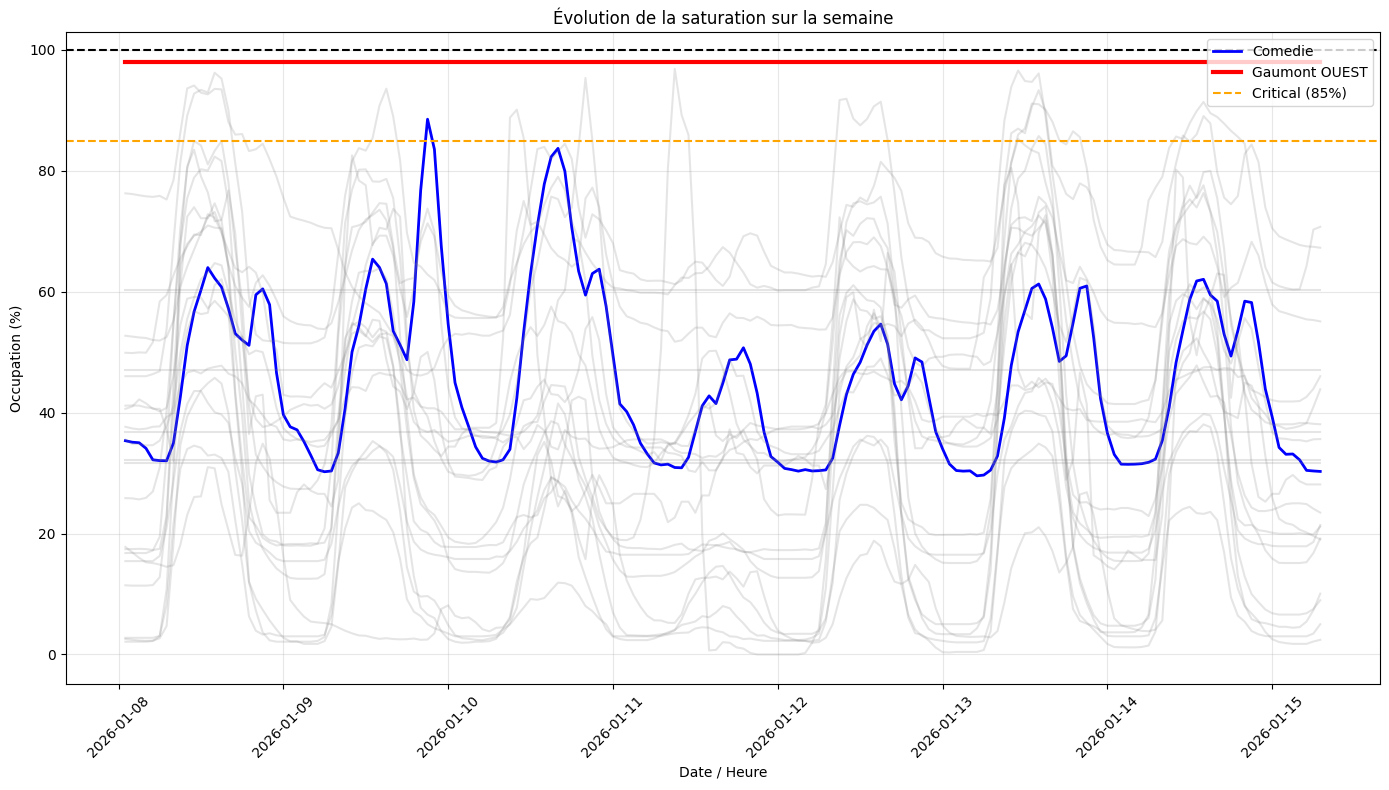

In [ ]:
# 3. Analyse Temporelle : Identification des Structures Saturées (Cycle Hebdomadaire)

# 1. preparer les dates (abscisse)
import pandas as pd
timestamps = [entry['heure'] for entry in voit_data]
dates = pd.to_datetime(timestamps)

plt.figure(figsize=(14, 8))

# 2. placer les courbes 
# on utilise la saturation calculer dans le graphe precedant 
for name, data_list in saturation_by_parking.items():
    
    # mettre en valeur le parking critique trouver precedament 
    if name == "Gaumont OUEST":
        plt.plot(dates, data_list, label=name, linewidth=3, color='red') # ligne rouge 
    
    # pour comparer a un parking "normal" (ici Comedie )
    elif name == "Comedie":
        plt.plot(dates, data_list, label=name, linewidth=2, color='blue') # ligne bleue
    
    # autre courbe son visible mais pas trop pour ne pas gacher le graphe visuelement
    else:
        plt.plot(dates, data_list, color='gray', alpha=0.2)

# ajouter les seuils
plt.axhline(y=100, color='black', linestyle='--')
plt.axhline(y=85, color='orange', linestyle='--', label='Critical (85%)')

plt.title("Évolution de la saturation sur la semaine")
plt.ylabel("Occupation (%)")
plt.xlabel("Date / Heure")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analyse de l'Évolution Temporelle
Ce graphique compare l'évolution de la saturation sur une semaine type.

* **Le Cas "Comédie" (Ligne Bleue) :** Ce parking a un comportement "sain" avec des cycles jour/nuit marqués. Il absorbe le flux de visiteurs en journée et se vide la nuit.
* **L'Anomalie "Gaumont OUEST" (Ligne Rouge) :** La courbe est plate et reste bloquée à près de 100%, même la nuit.
    * **Hypothèse 1 :** Saturation par des "voitures ventouses" (résidents qui laissent leur véhicule longue durée).
    * **Hypothèse 2 :** Défaillance technique du capteur.
    * **Conclusion :** Ce parking n'offre aucune rotation et ne participe pas à la fluidification du trafic ville.

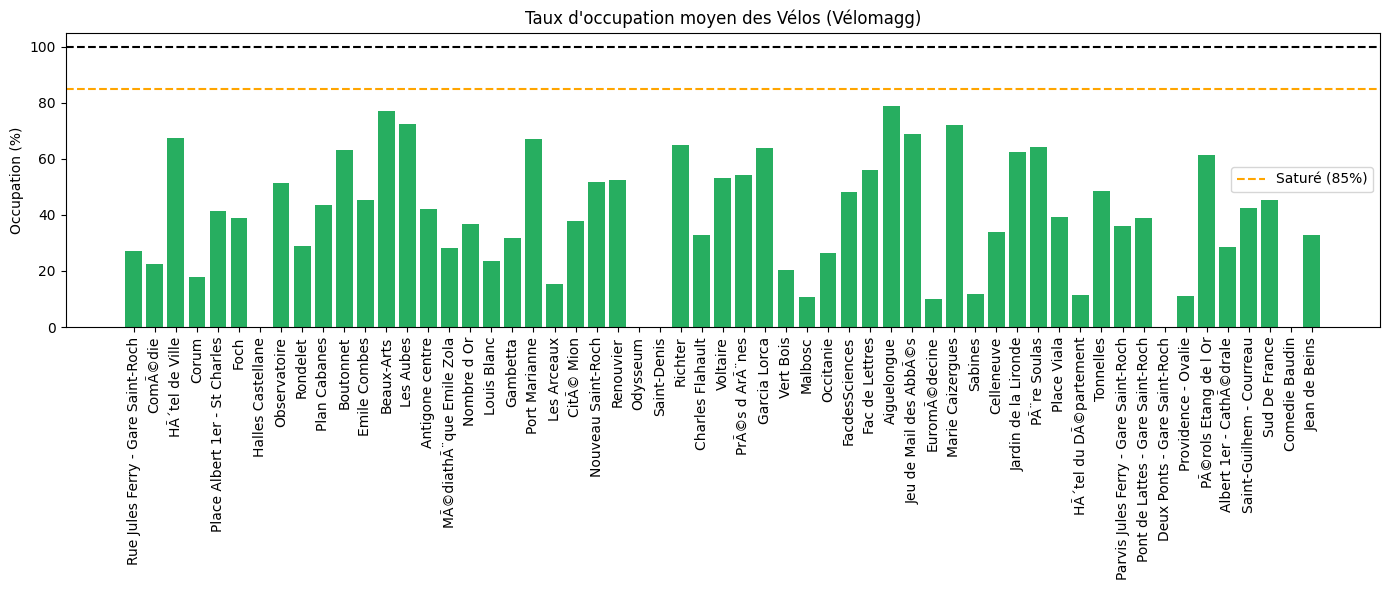

In [ ]:
# 4. Diagnostic du Réseau Vélomagg : Taux de Disponibilité des Bornes
import json
import matplotlib.pyplot as plt
import analyses 

# ouvrire les donnee velo
with open('VELO169.json', 'r') as f:
    vel_data = json.load(f)

# --- STEP 2: REORGANIZE BIKE DATA ---
bike_saturation_by_station = {}

for hour_entry in vel_data:
    for station in hour_entry['donnees']:
        name = station['station']
        bikes = station['velos']
        total_slots = station['total']
        
        # meme qu'avant (eviter de diviser par zero)
        if total_slots > 0:
            percentage = (bikes / total_slots) * 100
        else:
            percentage = 0
            
        if name not in bike_saturation_by_station:
            bike_saturation_by_station[name] = []
        
        bike_saturation_by_station[name].append(percentage)

#visualiser
bike_names = list(bike_saturation_by_station.keys())
bike_values = list(bike_saturation_by_station.values())

# calculer avec mon outils moy de analyses.py
means_bikes = analyses.moy(*bike_values)

# creer le graph
plt.figure(figsize=(14, 6))
plt.bar(bike_names, means_bikes, color='#27ae60') 

# ajouter les seuils
plt.axhline(y=100, color='black', linestyle='--')
plt.axhline(y=85, color='orange', linestyle='--', label='Saturé (85%)')

plt.title("Taux d'occupation moyen des Vélos (Vélomagg)")
plt.ylabel("Occupation (%)")
plt.xticks(rotation=90) #noms en colones
plt.legend()
plt.tight_layout()
plt.show()

### Analyse des Parkings Vélos (Vélomagg)
Contrairement aux voitures, le réseau de stationnement vélo ne présente **aucune saturation critique**.

* **Dimensionnement :** Aucun parking ne franchit la barre des 85% (Seuil de saturation). La moyenne se situe autour de 40-50%.
* **Disponibilité :** Il est facile de trouver une place pour son vélo partout dans la ville.
* **Conclusion Politique :** L'infrastructure est saine et sous-utilisée. La mairie peut intensifier sa politique d'incitation au vélo sans craindre de saturer les bornes actuelles.

--- Comédie ---
Correlation Score: 0.3387
>> CONCLUSION: No Relation (Independent).
------------------------------
--- Corum ---
Correlation Score: 0.1948
>> CONCLUSION: No Relation (Independent).
------------------------------
--- Sabines ---
Correlation Score: -0.1497
>> CONCLUSION: No Relation (Independent).
------------------------------


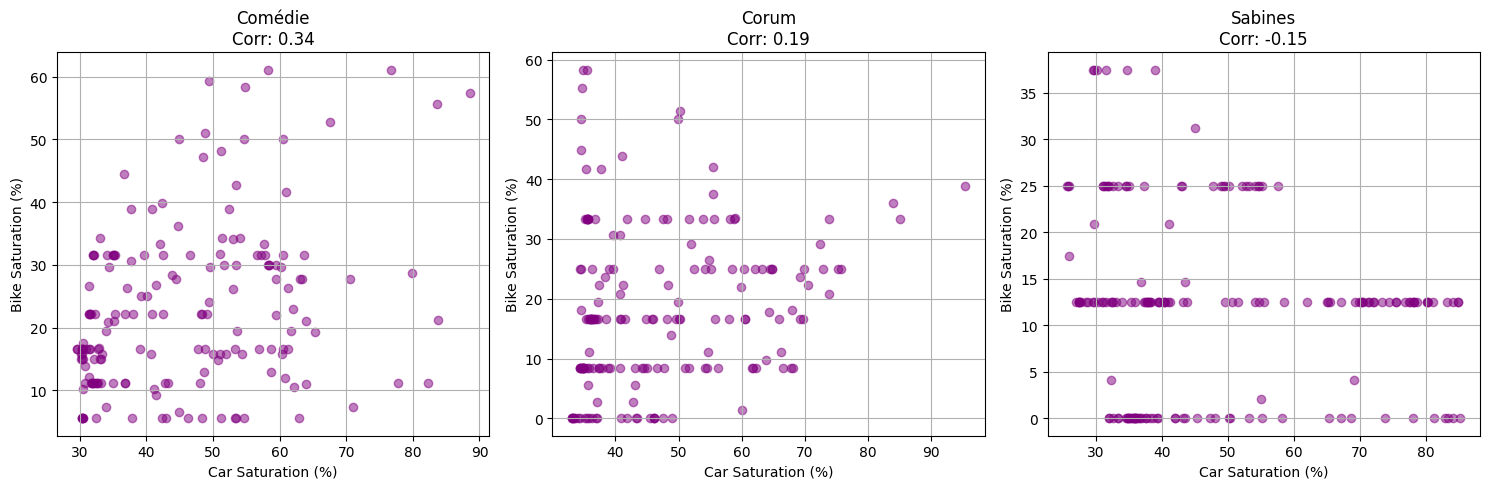

In [ ]:
# 5. Étude de l'Intermodalité : Corrélation entre Trafic Voiture et Usage Vélo

# on test 3 paires pour voir si le comportement est consistant
pairs_to_test = [
    ("Comédie", "Comedie", "ComÃ©die"),  # Label, Car Key, Bike Key
    ("Corum",   "Corum",   "Corum"),
    ("Sabines", "Sabines", "Sabines")
]

plt.figure(figsize=(15, 5))

for i, (label, car_key, bike_key) in enumerate(pairs_to_test):
    
    # 1. Get the data lists raporter les listes
    car_list = saturation_by_parking.get(car_key)
    bike_list = bike_saturation_by_station.get(bike_key)

    if car_list and bike_list:
        # utiliser mon outil correl de ma librarie
        score = analyses.correl(car_list, bike_list)
        
        # 3. ecrire les rapport
        print(f"--- {label} ---")
        print(f"Correlation Score: {round(score, 4)}")
        
        # definire les interpretations
        if score > 0.5:
            print(">> CONCLUSION: Positive Link (Cars and Bikes fill up together).")
        elif score < -0.5:
            print(">> CONCLUSION: Negative Link (When one fills, the other empties).")
        else:
            print(">> CONCLUSION: No Relation (Independent).")
        print("-" * 30)

        # 4. visualisation
        plt.subplot(1, 3, i+1)
        plt.scatter(car_list, bike_list, alpha=0.5, color='purple')
        plt.title(f"{label}\nCorr: {round(score, 2)}")
        plt.xlabel("Car Saturation (%)")
        plt.ylabel("Bike Saturation (%)")
        plt.grid(True)

plt.tight_layout()
plt.show()

### Analyse de la Corrélation (Intermodalité)
Nous avons cherché à savoir si l'usage du parking voiture entraînait un usage du parking vélo situé au même endroit (Le principe du "Relais").

* **Résultats :** Les scores de corrélation sont faibles (entre -0.15 et +0.34) pour les sites majeurs comme Comédie ou Sabines.
* **Interprétation :** Il n'y a pas de lien direct et synchronisé entre le remplissage des parkings voitures et des bornes vélos.
* **Conclusion pour la Mairie :** 1. L'intermodalité **Voiture -> Vélo** ne se fait pas directement à la sortie du parking.
    2. Il est probable que les usagers privilégient le **Tramway** après avoir garé leur voiture (surtout aux Sabines/Corum).
    3. Les vélos sont davantage utilisés par des résidents locaux que par des automobilistes en transit.